Silhouette Score: 0.47


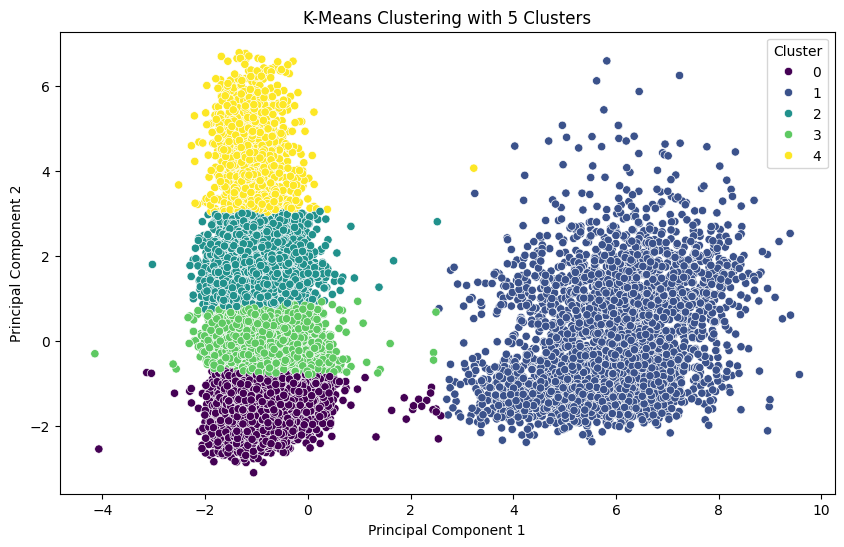

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Separar las características
X = processed_data.drop('retention', axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluar los clusters usando silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Agregar los clusters a los datos originales para visualización
processed_data['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


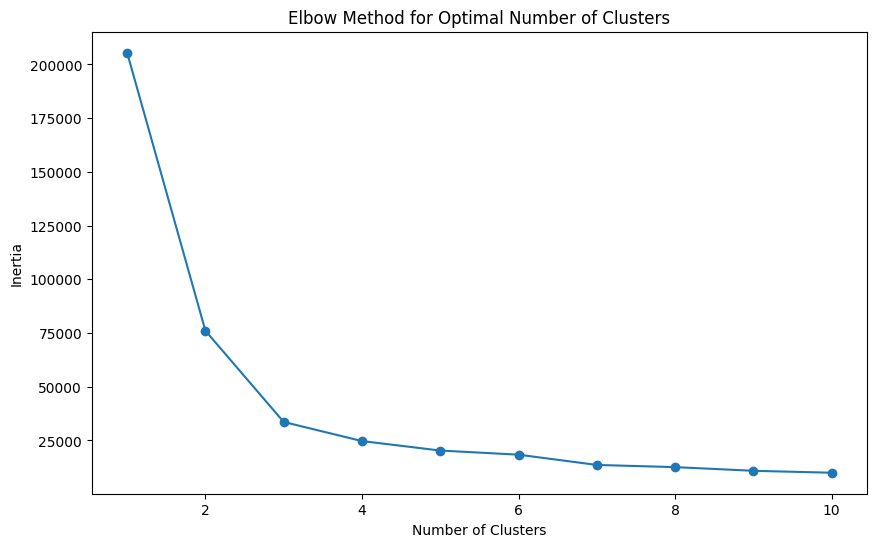

In [2]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Metodo del Codo

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Separar las características
X = processed_data.drop('retention', axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar la preparación de los datos
X_scaled.shape, X.columns


((24317, 33),
 Index(['generation', 'educational.model', 'level', 'gender', 'age',
        'max.degree.parents', 'father.education.complete',
        'father.education.summary', 'mother.education.complete',
        'mother.education.summary', 'parents.exatec', 'father.exatec',
        'mother.exatec', 'tec.no.tec', 'foreign', 'school', 'program', 'region',
        'PNA', 'admission.test', 'online.test', 'english.evaluation',
        'admission.rubric', 'FTE', 'scholarship.perc', 'scholarship.type',
        'loan.perc', 'total.scholarship.loan', 'school.cost',
        'id.school.origin', 'physical.education', 'cultural.diffusion',
        'student.society'],
       dtype='object'))

In [4]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Verificar la reducción de dimensionalidad
X_pca.shape


(24317, 2)

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluar los clusters usando silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
silhouette_avg


0.46631817135744225

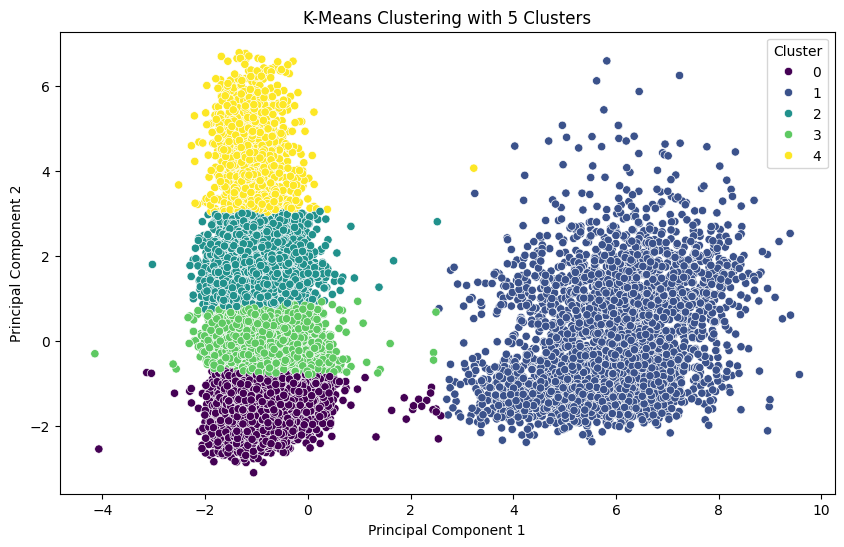

In [6]:
import seaborn as sns

# Agregar los clusters a los datos originales para visualización
processed_data['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.47


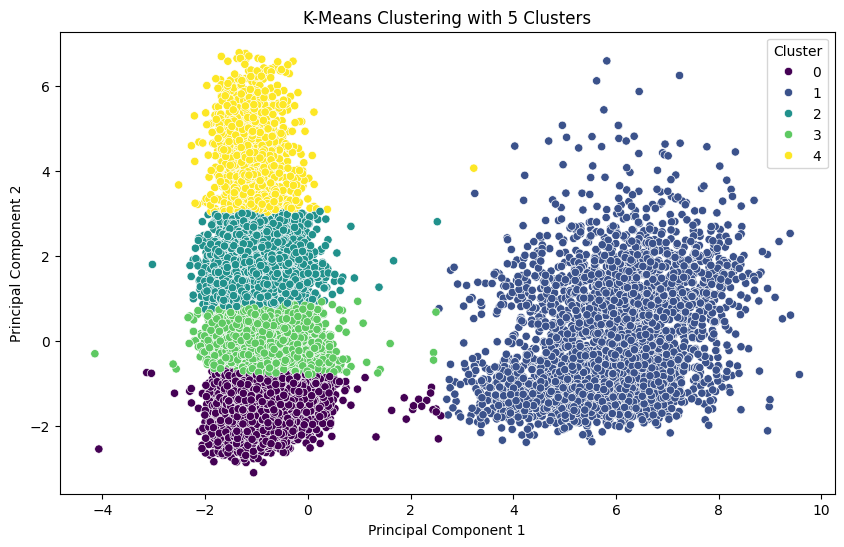

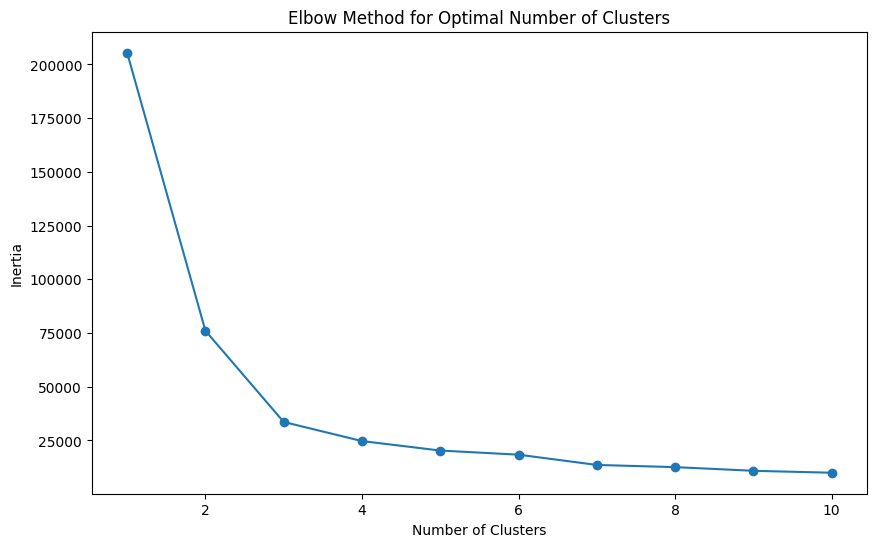

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'  # Reemplaza con la ruta correcta
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Separar las características
X = processed_data.drop('retention', axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluar los clusters usando silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Agregar los clusters a los datos originales para visualización
processed_data['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Silhouette Score: 0.47


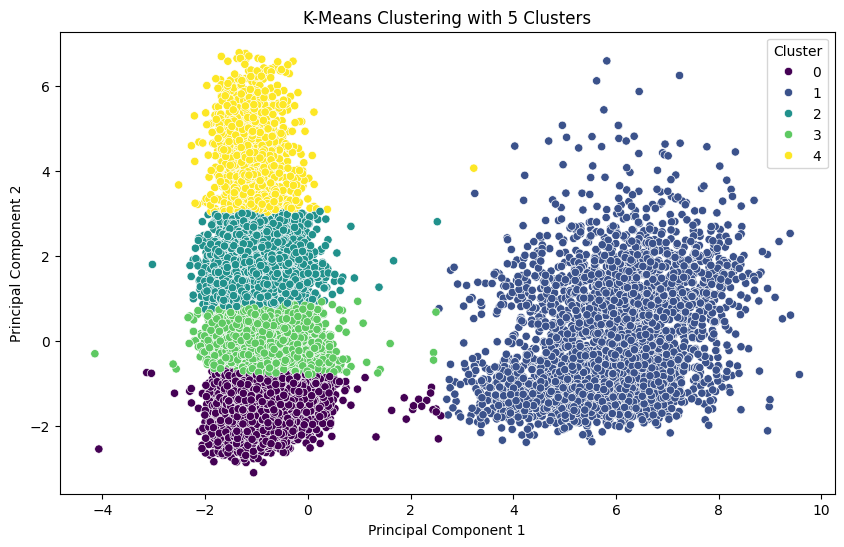

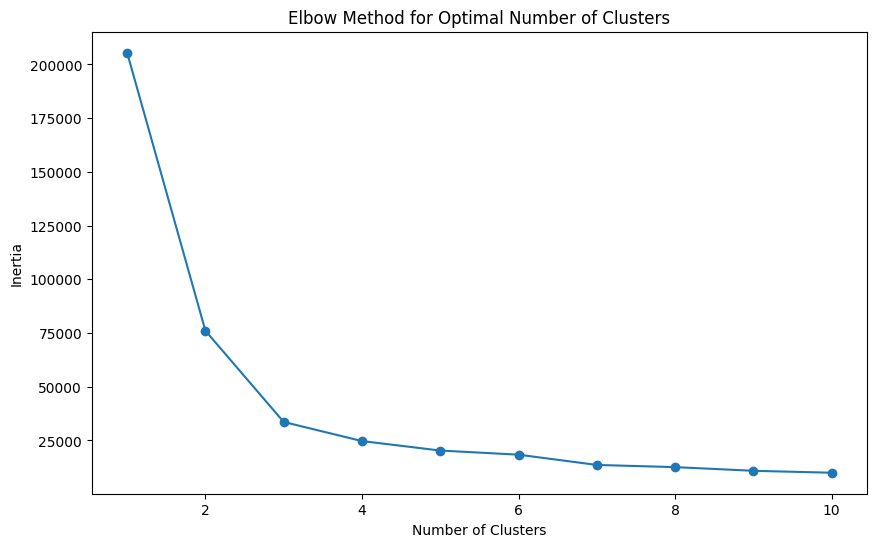

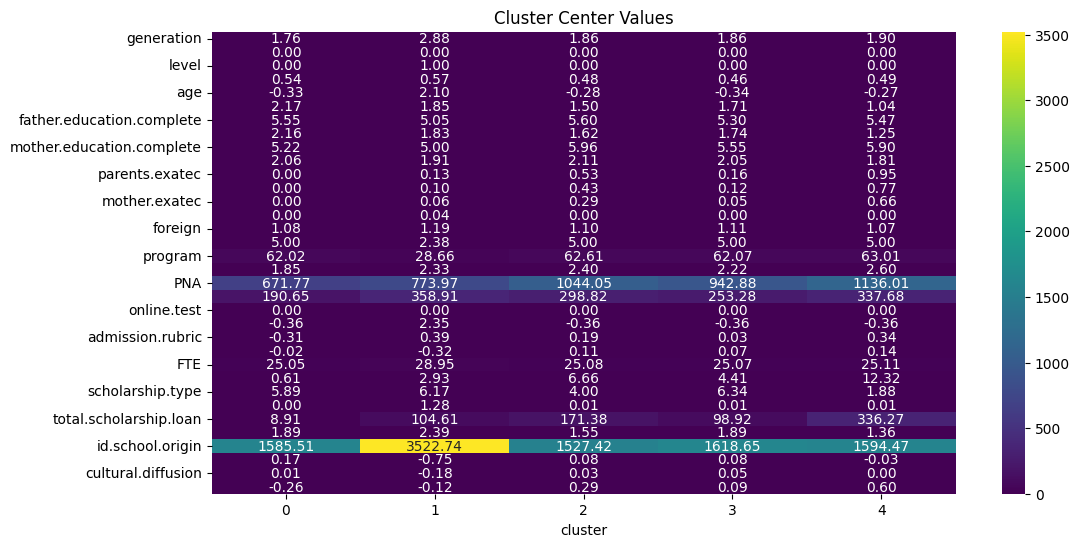

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'  # Reemplaza con la ruta correcta
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Separar las características
X = processed_data.drop('retention', axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluar los clusters usando silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Agregar los clusters a los datos originales
processed_data['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Analizar las características promedio de cada cluster
cluster_means = processed_data.groupby('cluster').mean()
# plot the cluster means

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Cluster Center Values')
plt.show()


# Exportar los datos con las etiquetas de los clusters
processed_data.to_csv('./data/labeled_clusters.csv', index=False)


         generation  educational.model     level    gender       age  \
cluster                                                                
0          1.763007                0.0  0.002135  0.537251 -0.334704   
1          2.877912                0.0  0.999689  0.566325  2.103254   
2          1.861223                0.0  0.000423  0.482124 -0.281266   
3          1.861494                0.0  0.000802  0.464572 -0.341182   
4          1.901945                0.0  0.000810  0.485413 -0.270669   

         max.degree.parents  father.education.complete  \
cluster                                                  
0                  2.166536                   5.546578   
1                  1.849643                   5.053743   
2                  1.498625                   5.603766   
3                  1.713049                   5.302821   
4                  1.035656                   5.471637   

         father.education.summary  mother.education.complete  \
cluster                 

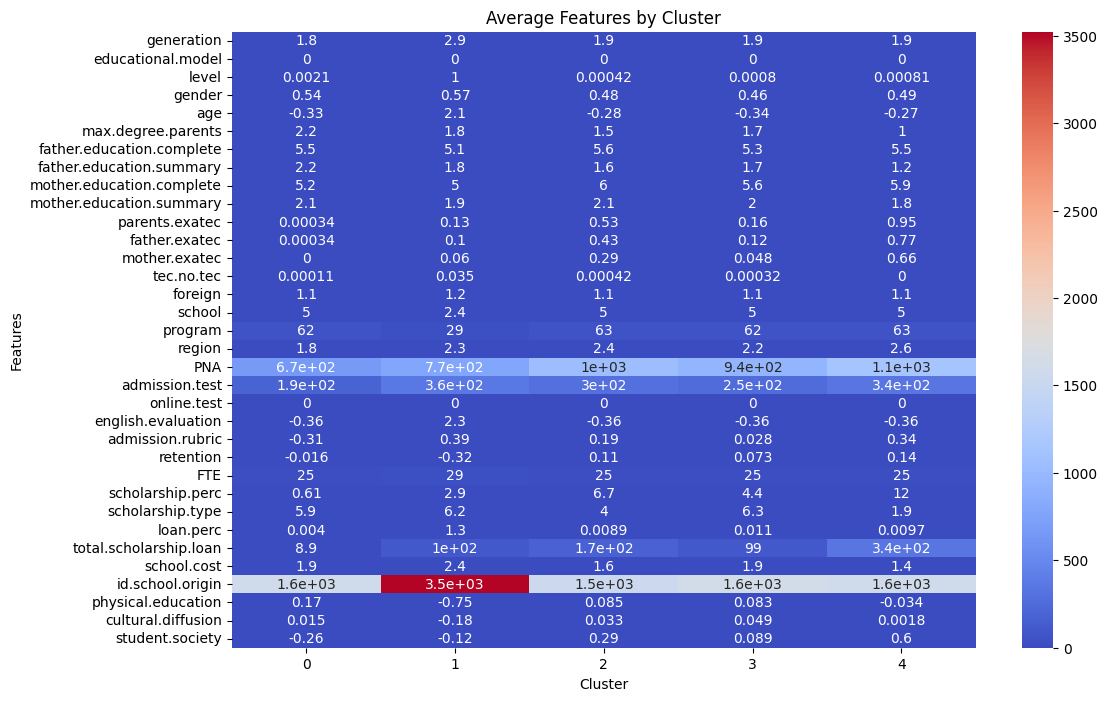

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos etiquetados con los clusters
labeled_data_path = './data/labeled_clusters.csv'  # Reemplaza con la ruta correcta
labeled_data = pd.read_csv(labeled_data_path)

# Analizar las características promedio de cada cluster
cluster_means = labeled_data.groupby('cluster').mean()
print(cluster_means)

# Visualización de las características promedio de cada cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Average Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


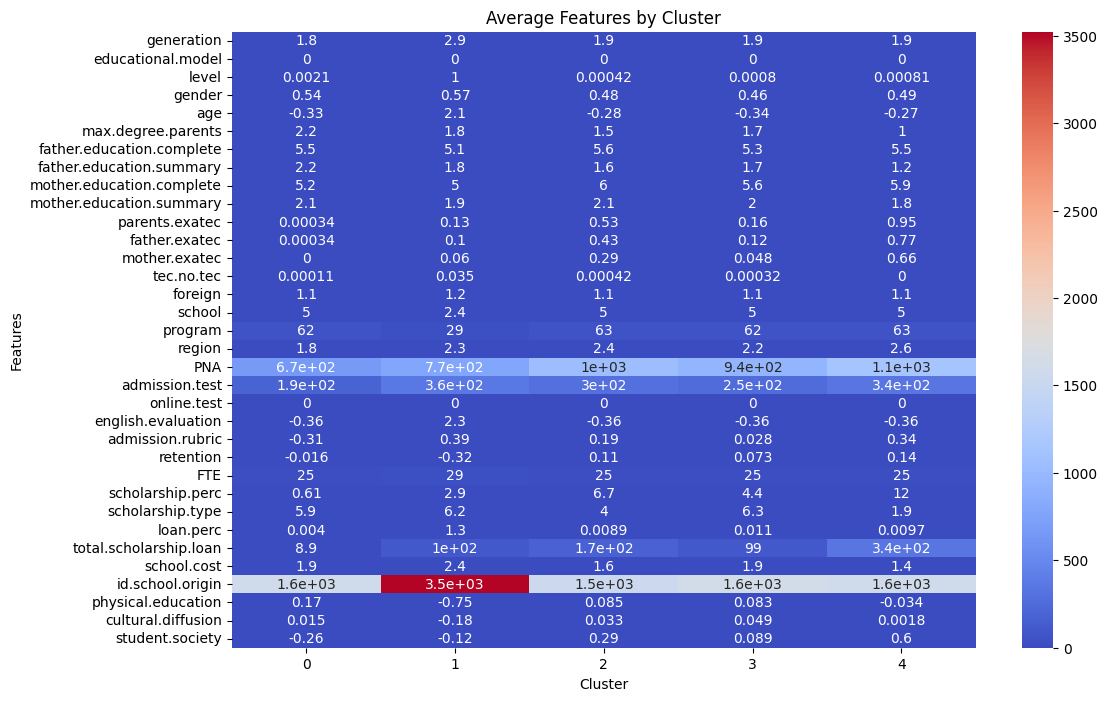

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos etiquetados con los clusters
labeled_data_path = './data/labeled_clusters.csv'  # Reemplaza con la ruta correcta
labeled_data = pd.read_csv(labeled_data_path)

# Analizar las características promedio de cada cluster
cluster_means = labeled_data.groupby('cluster').mean()

# Visualización de las características promedio de cada cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Average Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()
